In [1]:
library(ISLR)
library(data.table)
library(boot) # for cv.glm (cross validation)

In [2]:
data(Hitters)
Hitters1=data.frame(Hitters)
Hitters1=na.omit(Hitters1) # remove NA's

Salary1<-log(Hitters1$Salary)
Hitters1=data.frame(Hitters1, Salary1)

HighSal = ifelse(Hitters1$Salary1<6.62, "No", "Yes") # cut can also be used, when there are more than two columns
Hitters1 = data.frame(Hitters1,HighSal)

In [3]:
head(Hitters1)
str(Hitters1)
dim(Hitters1)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,Salary1,HighSal
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,...,375,N,W,632,43,10,475.0,N,6.163315,No
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,...,263,A,W,880,82,14,480.0,A,6.173786,No
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,...,354,N,E,200,11,3,500.0,N,6.214608,No
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,...,33,N,E,805,40,4,91.5,N,4.516339,No
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,...,194,A,W,282,421,25,750.0,A,6.620073,Yes
-Al Newman,185,37,1,23,8,21,2,214,42,1,...,24,N,E,76,127,7,70.0,A,4.248495,No


'data.frame':	263 obs. of  22 variables:
 $ AtBat    : int  315 479 496 321 594 185 298 323 401 574 ...
 $ Hits     : int  81 130 141 87 169 37 73 81 92 159 ...
 $ HmRun    : int  7 18 20 10 4 1 0 6 17 21 ...
 $ Runs     : int  24 66 65 39 74 23 24 26 49 107 ...
 $ RBI      : int  38 72 78 42 51 8 24 32 66 75 ...
 $ Walks    : int  39 76 37 30 35 21 7 8 65 59 ...
 $ Years    : int  14 3 11 2 11 2 3 2 13 10 ...
 $ CAtBat   : int  3449 1624 5628 396 4408 214 509 341 5206 4631 ...
 $ CHits    : int  835 457 1575 101 1133 42 108 86 1332 1300 ...
 $ CHmRun   : int  69 63 225 12 19 1 0 6 253 90 ...
 $ CRuns    : int  321 224 828 48 501 30 41 32 784 702 ...
 $ CRBI     : int  414 266 838 46 336 9 37 34 890 504 ...
 $ CWalks   : int  375 263 354 33 194 24 12 8 866 488 ...
 $ League   : Factor w/ 2 levels "A","N": 2 1 2 2 1 2 1 2 1 1 ...
 $ Division : Factor w/ 2 levels "E","W": 2 2 1 1 2 1 2 2 1 1 ...
 $ PutOuts  : int  632 880 200 805 282 76 121 143 0 238 ...
 $ Assists  : int  43 82 11 40 42

[1] 263  22

## Model 1 - log.fit

In [4]:
# glm - generalised linear model fitting
# fits logistic regression with family=binomial, fits logit function

log.fit = glm(HighSal~AtBat+Hits+Years+League, data = Hitters1, family = binomial)
coef(log.fit) # Years is most impactful
summary(log.fit)$coef # Years is most impactful < 0.05

(Intercept)        AtBat         Hits        Years      LeagueN 
-6.299755413  0.005128261  0.010777969  0.206383384  0.147374365

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-6.299755413,0.910245710,-6.9209394,4.486583e-12
AtBat,0.005128261,0.004053662,1.2650935,2.058378e-01
Hits,0.010777969,0.012420578,0.8677510,3.855306e-01
Years,0.206383384,0.037488771,5.5052054,3.687380e-08
LeagueN,0.147374365,0.335663266,0.4390542,6.606223e-01


In [5]:
summary(log.fit)
# Null deviance: 304.77 - RSS when no features are selected
# AIC (Akchnine Information Criteria) should be the lowest as represents error
# RSS should be max as its reduction in RSS


Call:
glm(formula = HighSal ~ AtBat + Hits + Years + League, family = binomial, 
    data = Hitters1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7690  -0.6759  -0.3605   0.5773   3.4084  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.299755   0.910246  -6.921 4.49e-12 ***
AtBat        0.005128   0.004054   1.265    0.206    
Hits         0.010778   0.012421   0.868    0.386    
Years        0.206383   0.037489   5.505 3.69e-08 ***
LeagueN      0.147374   0.335663   0.439    0.661    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 304.77  on 262  degrees of freedom
Residual deviance: 227.83  on 258  degrees of freedom
AIC: 237.83

Number of Fisher Scoring iterations: 5


## Model 2 - log.fit2

In [6]:
log.fit2 = glm(HighSal~. -Salary1-Salary, data = Hitters1, family = binomial)

#coef(log.fit2) # Years is most impactful
#summary(log.fit2)$coef # Years is most impactful < 0.05

# all variables should be independent of each other.
# VIF - Variance Influence Factor, Variables are corelated or not, if value is more than 5 those will be highly corelted. Multicolinearity
# should not use highly correlated variables
# Use cor(Hitters1[1:4]) such like to see colinearity. on numeric columns only.

summary(log.fit2)


Call:
glm(formula = HighSal ~ . - Salary1 - Salary, family = binomial, 
    data = Hitters1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9896  -0.5295  -0.2959   0.1643   3.1457  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.4811751  1.0976178  -4.083 4.45e-05 ***
AtBat        0.0008590  0.0059492   0.144   0.8852    
Hits         0.0130527  0.0231071   0.565   0.5722    
HmRun        0.0595967  0.0585420   1.018   0.3087    
Runs        -0.0279304  0.0267644  -1.044   0.2967    
RBI         -0.0137384  0.0247643  -0.555   0.5791    
Walks        0.0383097  0.0174461   2.196   0.0281 *  
Years       -0.2066964  0.1368856  -1.510   0.1310    
CAtBat       0.0000525  0.0012151   0.043   0.9655    
CHits        0.0045971  0.0064962   0.708   0.4792    
CHmRun       0.0010765  0.0141199   0.076   0.9392    
CRuns        0.0009699  0.0066257   0.146   0.8836    
CRBI        -0.0008377  0.0064291  -0.130   0.8963    
CWalks 

In [7]:
cor(Hitters1[1:4])

,AtBat,Hits,HmRun,Runs
AtBat,1.0000000,0.9639691,0.5551022,0.8998291
Hits,0.9639691,1.0000000,0.5306274,0.9106301
HmRun,0.5551022,0.5306274,1.0000000,0.6310759
Runs,0.8998291,0.9106301,0.6310759,1.0000000


## Model 3 - log.fit3

In [8]:
log.fit3 = glm(HighSal~CAtBat+CHits+Years+League, data = Hitters1, family = binomial)
summary(log.fit3)$coef
summary(log.fit3)

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-1.6415460918,0.3711770722,-4.4225417,9.754650e-06
CAtBat,-0.0006533893,0.0008642893,-0.7559845,4.496585e-01
CHits,0.0070315523,0.0028287554,2.4857406,1.292821e-02
Years,-0.3927083250,0.1218074909,-3.2240080,1.264099e-03
LeagueN,-0.2624681862,0.3432473270,-0.7646620,4.444728e-01



Call:
glm(formula = HighSal ~ CAtBat + CHits + Years + League, family = binomial, 
    data = Hitters1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0789  -0.5774  -0.4353   0.2869   2.5103  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.6415461  0.3711771  -4.423 9.75e-06 ***
CAtBat      -0.0006534  0.0008643  -0.756  0.44966    
CHits        0.0070316  0.0028288   2.486  0.01293 *  
Years       -0.3927083  0.1218075  -3.224  0.00126 ** 
LeagueN     -0.2624682  0.3432473  -0.765  0.44447    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 304.77  on 262  degrees of freedom
Residual deviance: 219.93  on 258  degrees of freedom
AIC: 229.93

Number of Fisher Scoring iterations: 5


## Predicting using log.fit model

In [9]:
log.probs = predict(log.fit, type = "response")
log.probs

-Alan Ashby       -Alvin Davis      -Andre Dawson  -Andres Galarraga 
       0.315485745        0.139070421        0.545163381        0.040864948 
  -Alfredo Griffin         -Al Newman   -Argenis Salazar     -Andres Thomas 
       0.698070299        0.012223439        0.033388286        0.038784778 
   -Andre Thornton     -Alan Trammell      -Alex Trevino     -Andy VanSlyke 
       0.361521700        0.603817564        0.063697725        0.122892031 
     -Alan Wiggins        -Bill Almon        -Buddy Bell  -Buddy Biancalana 
       0.039577117        0.119118403        0.826230066        0.021930930 
      -Bruce Bochy       -Barry Bonds     -Bobby Bonilla        -Bob Brenly 
       0.029166624        0.055385832        0.061000423        0.223862589 
     -Bill Buckner      -Brett Butler       -Bob Dernier           -Bo Diaz 
       0.920672567        0.426937547        0.094546079        0.433547099 
       -Bill Doran     -Brian Downing     -Billy Hatcher      -Brook Jacoby 
       0.340364727        0.667520435        0.097927376        0.385240447 
      -Bob Kearney      -Bill Madlock        -Bob Melvin  -BillyJo Robidoux 
       0.036236257        0.455880534        0.023693815        0.010805062 
   -Bill Schroeder       -Chris Bando       -Chris Brown   -Carmen Castillo 
       0.020520384        0.046266112        0.121619515        0.026540076 
      -Chili Davis      -Carlton Fisk         -Curt Ford   -Carney Lansford 
       0.344561476        0.654968686        0.016775235        0.598494495 
       -Chet Lemon   -Candy Maldonado  -Carmelo Martinez    -Craig Reynolds 
       0.338969296        0.149594854        0.030756049        0.226189622 
       -Cal Ripken       -Cory Snyder      -Chris Speier    -Curt Wilkerson 
       0.515411378        0.060534084        0.170634684        0.025077523 
    -Dave Anderson        -Don Baylor      -Daryl Boston     -Darnell Coles 
       0.025384339        0.846437989        0.016482293        0.218927679 
  -Dave Concepcion     -Doug DeCinces     -Darrell Evans      -Dwight Evans 
       0.456123433        0.651853284        0.790854865        0.728183755 
    -Damaso Garcia       -Dan Gladden    -Dave Henderson       -Donnie Hill 
       0.271832708        0.077174938        0.123298423        0.062911050 
      -Davey Lopes     -Don Mattingly       -Dale Murphy     -Dwayne Murphy 
       0.270030881        0.683337174        0.735633837        0.134640628 
      -Dave Parker        -Dan Pasqua    -Darrell Porter    -Dick Schofield 
       0.867502565        0.027457295        0.146684656        0.130472228 
      -Don Slaught -Darryl Strawberry        -Dale Sveum   -Danny Tartabull 
       0.059357028        0.172896976        0.025906038        0.171831232 
    -Denny Walling     -Dave Winfield        -Eric Davis      -Eddie Milner 
       0.393122325        0.746913647        0.102888327        0.206240409 
     -Eddie Murray         -Ed Romero       -Frank White       -George Bell 
       0.482517365        0.050898463        0.759878756        0.538278619 
     -Glenn Braggs      -George Brett        -Greg Brock       -Gary Carter 
       0.011645524        0.557434146        0.066941196        0.596450465 
      -Glenn Davis       -Gary Gaetti        -Greg Gagne   -George Hendrick 
       0.278611838        0.459593592        0.144070857        0.328181855 
    -Glenn Hubbard        -Garth Iorg     -Gary Matthews     -Graig Nettles 
       0.233353555        0.113485779        0.468917956        0.650353776 
      -Gary Pettis        -Gary Redus   -Garry Templeton       -Greg Walker 
       0.267848069        0.077880013        0.522802514        0.048292232 
        -Gary Ward      -Glenn Wilson     -Harold Baines      -Hubie Brooks 
       0.196772005        0.395885048        0.472406515        0.117373526 
   -Howard Johnson         -Hal McRae   -Harold Reynolds     -Harry Spilman 
       0.031977079        0.400174011        0.106678508        0.041437501 
  -

In [10]:
log.pred = rep("No", 263)
log.pred[log.probs > 0.5] = "Yes"
pred.tab <- table(predicted=log.pred, True=Hitters1$HighSal)
pred.tab
#plot(pred.tab)

         True
predicted  No Yes
      No  174  40
      Yes  19  30

In [11]:
sum(pred.tab[c(1,4)])/sum(pred.tab[1:4]) # correct predictions
1-sum(pred.tab[c(1,4)])/sum(pred.tab[1:4]) # prediction error

[1] 0.7756654

[1] 0.2243346

#### Using Cross Validation

In [12]:
cv.log.fit <- cv.glm(Hitters1, log.fit, K=10)
cv.log.fit$delta[1] # CV estimate of prediction error

[1] 0.1400046

# KNN

In [13]:
library(class)
set.seed(1)
train = sample(1:nrow(Hitters1), 4*nrow(Hitters1)/5)
test=(-train)

In [14]:
x.train <- cbind(Hitters1$AtBat[train], Hitters1$Hits[train], Hitters1$Years[train], Hitters1$League[train])

x.test <- cbind(Hitters1$AtBat[test], Hitters1$Hits[test], Hitters1$Years[test], Hitters1$League[test])

y.train.cat <- Hitters1$HighSal[train]
y.test.cat <- Hitters1$HighSal[test]

y.train.reg <- Hitters1$Salary1[train]
y.test.reg <- Hitters1$Salary1[test]

## Categorical Data

In [15]:
# k=6
    knn.pred.cat = knn(x.train, x.test, y.train.cat, k=6)

    pred.tab <- table(knn.pred.cat, y.test.cat)
    sum(pred.tab[c(1,4)])/sum(pred.tab[1:4]) # correct prediction
    1 - sum(pred.tab[c(1,4)])/sum(pred.tab[1:4]) # prediction error

[1] 0.7924528

[1] 0.2075472

In [16]:
# k= 1 to 10
for (i in 1:10)
{
    knn.pred.cat = knn(x.train, x.test, y.train.cat, k=i)

    pred.tab <- table(knn.pred.cat, y.test.cat)
    #cat("\ni = ",i,sum(pred.tab[c(1,4)])/sum(pred.tab[1:4])) # correct prediction
    cat("\ni = ",i,1 - sum(pred.tab[c(1,4)])/sum(pred.tab[1:4])) # prediction error
}


i =  1 0.3207547
i =  2 0.3018868
i =  3 0.2075472
i =  4 0.1886792
i =  5 0.2264151
i =  6 0.2075472
i =  7 0.2264151
i =  8 0.2264151
i =  9 0.2264151
i =  10 0.2641509

## Regression

In [17]:
knn.pred.reg = knn(x.train, x.test, y.train.reg, k=4)
knn.pred.reg <- as.numeric(knn.pred.reg)
sum((y.test.reg - knn.pred.reg)^2) #RSS

[1] 224535

# Decision Tree

In [18]:
library(tree)

In [19]:
#Residual Mean Deviance = divide by (no.of rows - terminal node)

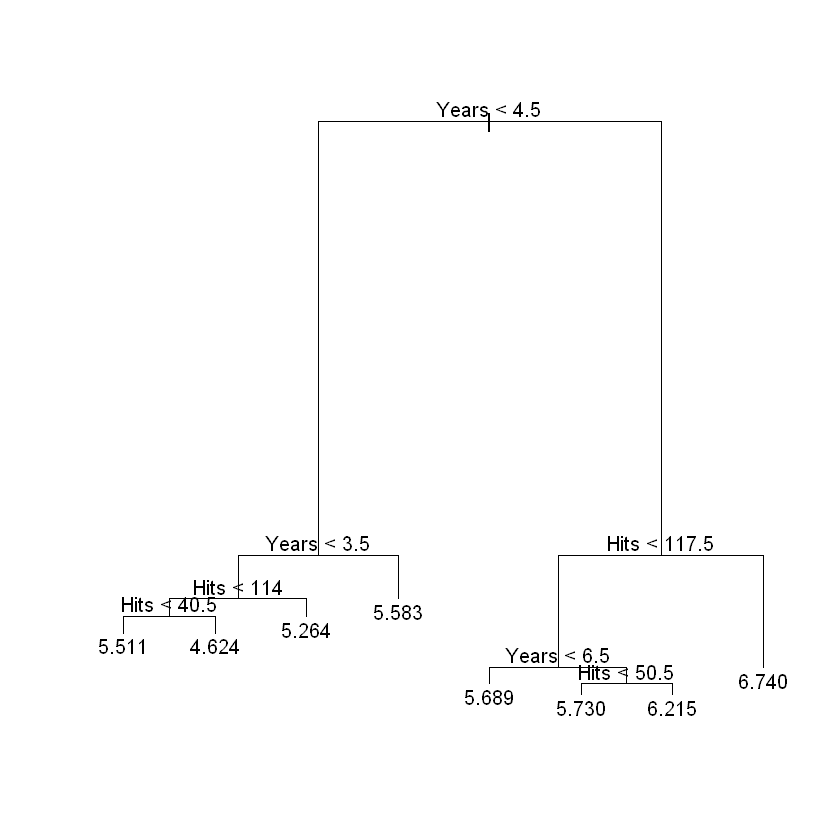

In [20]:
tree.hitters = tree(Salary1~Years+Hits, Hitters1)
plot(tree.hitters)
text(tree.hitters)


Regression tree:
tree(formula = Salary1 ~ Years + Hits, data = Hitters1)
Number of terminal nodes:  8 
Residual mean deviance:  0.2708 = 69.06 / 255 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.2400 -0.2980 -0.0365  0.0000  0.3233  2.1520 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 263 207.200 5.927  
   2) Years < 4.5 90  42.350 5.107  
     4) Years < 3.5 62  23.010 4.892  
       8) Hits < 114 43  17.150 4.727  
        16) Hits < 40.5 5  10.400 5.511 *
        17) Hits > 40.5 38   3.280 4.624 *
       9) Hits > 114 19   2.069 5.264 *
     5) Years > 3.5 28  10.130 5.583 *
   3) Years > 4.5 173  72.710 6.354  
     6) Hits < 117.5 90  28.090 5.998  
      12) Years < 6.5 26   7.238 5.689 *
      13) Years > 6.5 64  17.350 6.124  
        26) Hits < 50.5 12   2.689 5.730 *
        27) Hits > 50.5 52  12.370 6.215 *
     7) Hits > 117.5 83  20.880 6.740 *

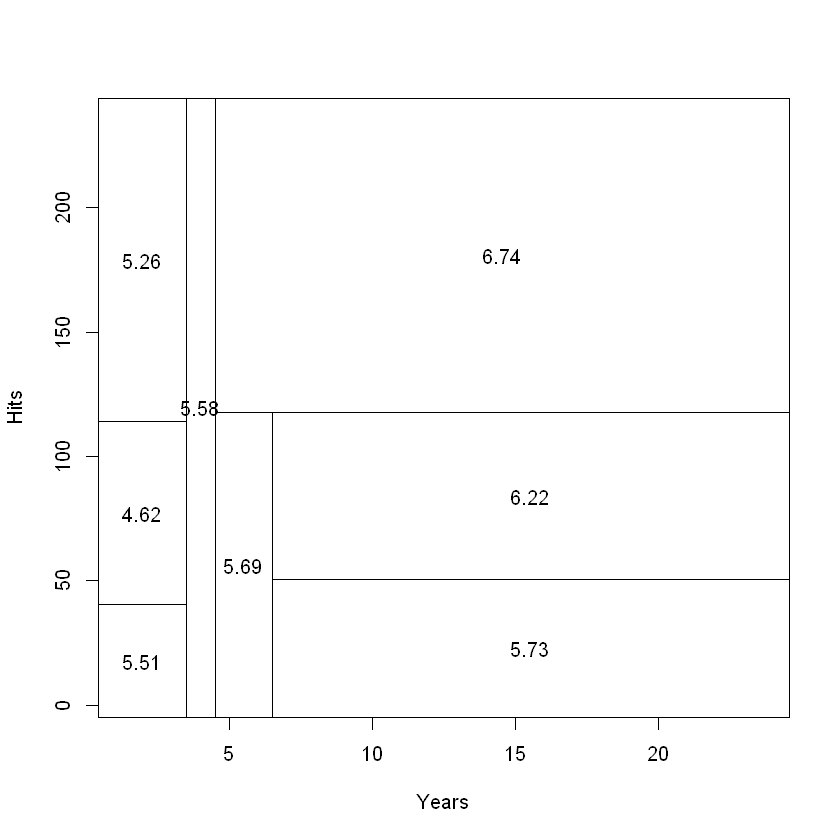

In [21]:
summary(tree.hitters)
tree.hitters
partition.tree(tree.hitters)


0%      25%      50%      75%     100% 
4.212128 5.247024 6.052089 6.620073 7.807917

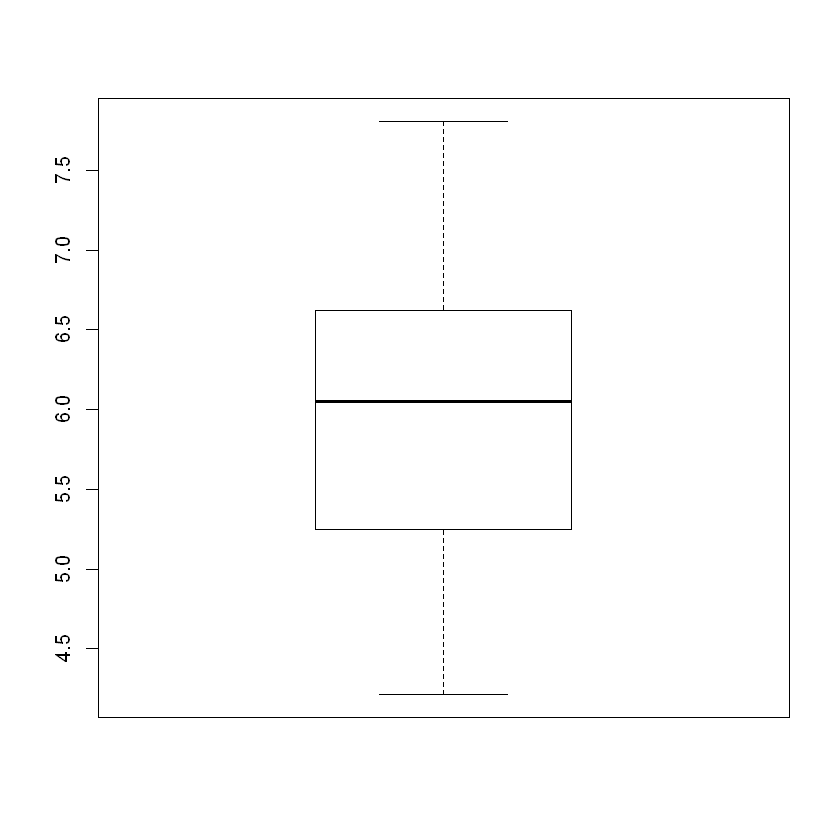

In [22]:
boxplot(Hitters1$Salary1)
quantile(Hitters1$Salary1)

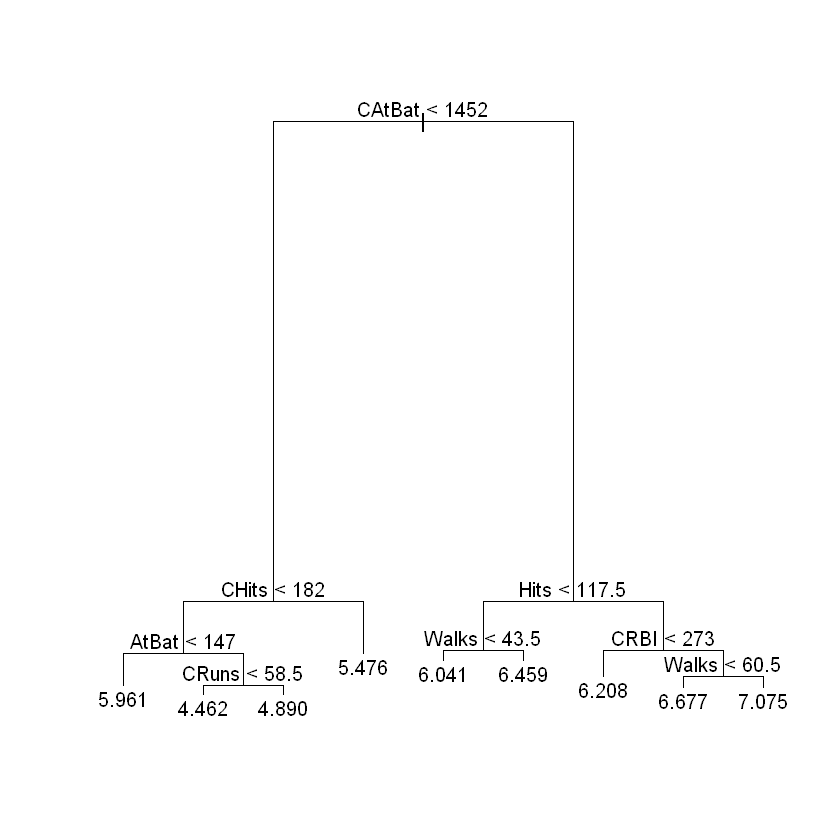

In [23]:
tree.hitters=tree(Salary1~.-Salary-HighSal, Hitters1)
plot(tree.hitters)
text(tree.hitters)

## Classification Tree


 No Yes 
193  70 

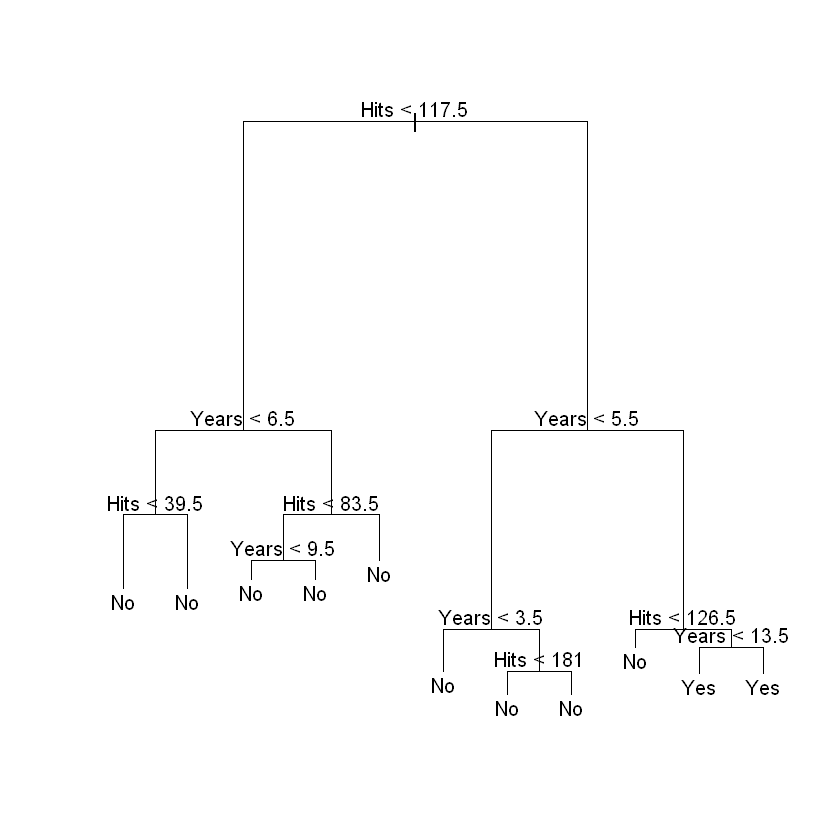

In [26]:
table(Hitters1$HighSal)
tree.hitters=tree(HighSal~Years+Hits, Hitters1)
plot(tree.hitters)
text(tree.hitters)

In [28]:
summary(tree.hitters)


Classification tree:
tree(formula = HighSal ~ Years + Hits, data = Hitters1)
Number of terminal nodes:  11 
Residual mean deviance:  0.6511 = 164.1 / 252 
Misclassification error rate: 0.1597 = 42 / 263 

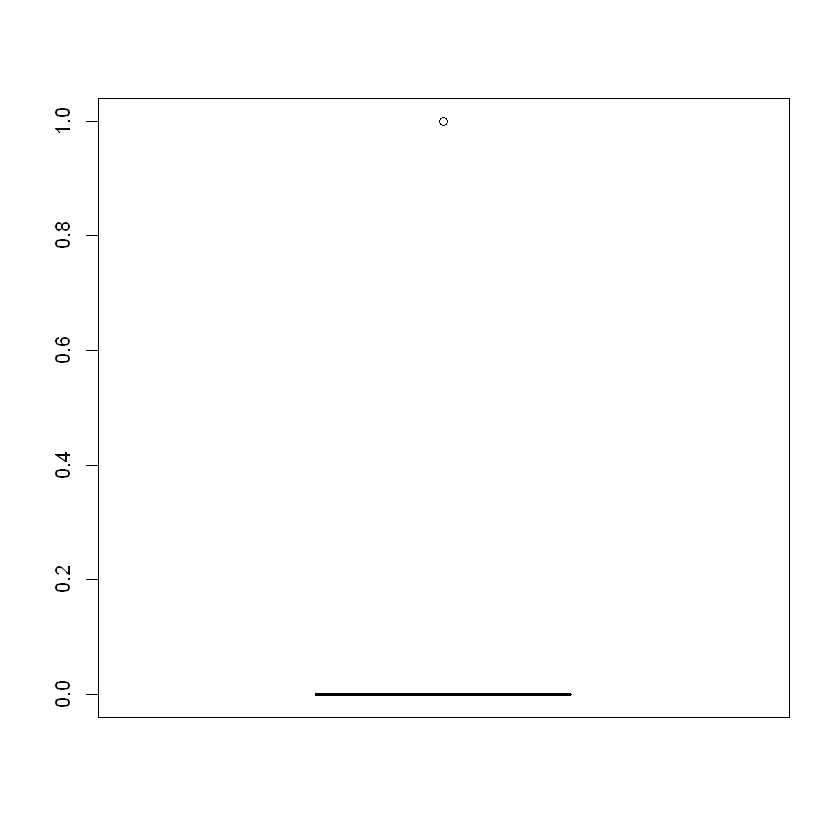

In [30]:
boxplot(residuals(tree.hitters))

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 263 304.800 No ( 0.73384 0.26616 )  
   2) Hits < 117.5 151  97.730 No ( 0.90066 0.09934 )  
     4) Years < 6.5 87  19.040 No ( 0.97701 0.02299 )  
       8) Hits < 39.5 5   6.730 No ( 0.60000 0.40000 ) *
       9) Hits > 39.5 82   0.000 No ( 1.00000 0.00000 ) *
     5) Years > 6.5 64  64.600 No ( 0.79688 0.20312 )  
      10) Hits < 83.5 41  26.210 No ( 0.90244 0.09756 )  
        20) Years < 9.5 13   0.000 No ( 1.00000 0.00000 ) *
        21) Years > 9.5 28  22.970 No ( 0.85714 0.14286 ) *
      11) Hits > 83.5 23  30.790 No ( 0.60870 0.39130 ) *
   3) Hits > 117.5 112 155.200 No ( 0.50893 0.49107 )  
     6) Years < 5.5 41  34.140 No ( 0.85366 0.14634 )  
      12) Years < 3.5 17   0.000 No ( 1.00000 0.00000 ) *
      13) Years > 3.5 24  26.990 No ( 0.75000 0.25000 )  
        26) Hits < 181 16  12.060 No ( 0.87500 0.12500 ) *
        27) Hits > 181 8  11.090 No ( 0.50000 0.50000 ) *
     7) Years > 5.

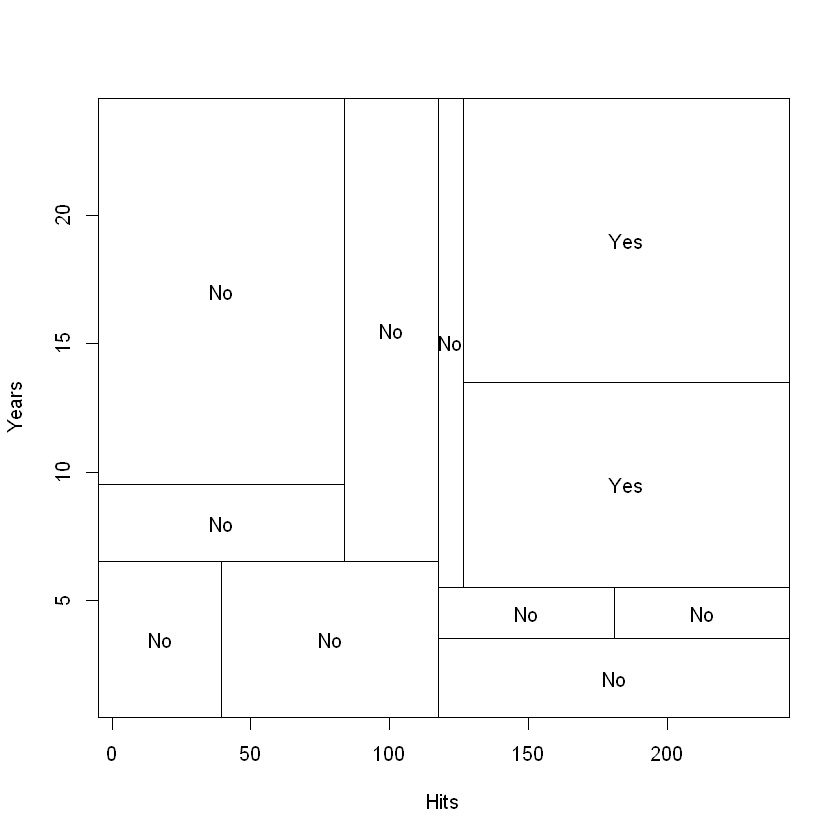

In [31]:
tree.hitters
partition.tree(tree.hitters)

## Classification tree with Categorical predictors

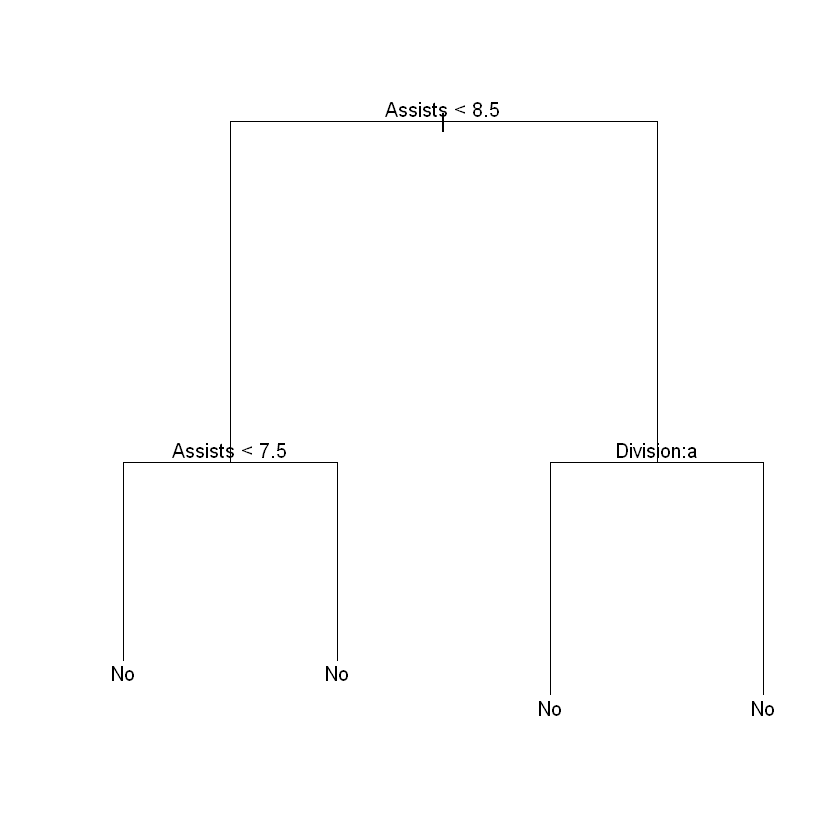

In [33]:
tree.hitters = tree(HighSal~Division+Assists,Hitters1)
plot(tree.hitters)
text(tree.hitters)

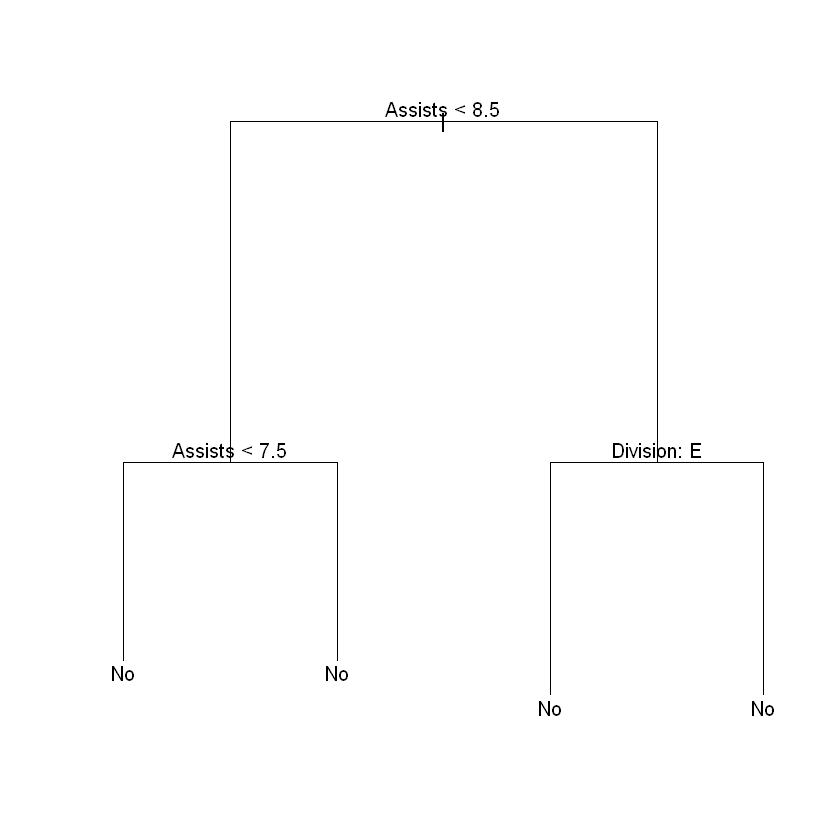

In [37]:
plot(tree.hitters)
text(tree.hitters, pretty = 0) # Shows the Actual values, Caution : tree will be filled with texts 

In [35]:
summary(tree.hitters)


Classification tree:
tree(formula = HighSal ~ Division + Assists, data = Hitters1)
Number of terminal nodes:  4 
Residual mean deviance:  1.13 = 292.6 / 259 
Misclassification error rate: 0.2662 = 70 / 263 

In [36]:
tree.hitters

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

1) root 263 304.80 No ( 0.7338 0.2662 )  
  2) Assists < 8.5 72  64.88 No ( 0.8333 0.1667 )  
    4) Assists < 7.5 64  61.77 No ( 0.8125 0.1875 ) *
    5) Assists > 7.5 8   0.00 No ( 1.0000 0.0000 ) *
  3) Assists > 8.5 191 234.50 No ( 0.6963 0.3037 )  
    6) Division: E 92 121.20 No ( 0.6304 0.3696 ) *
    7) Division: W 99 109.70 No ( 0.7576 0.2424 ) *

In [38]:
partition.tree(tree.hitters) # Will generate error coz partition needs both quantitave variables

ERROR: Error in partition.tree(tree.hitters): tree can only have continuous predictors


# Random Forest

In [39]:
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [40]:
set.seed(1)

In [41]:
train=sample(1:nrow(Hitters1), nrow(Hitters1)*2/3)
Hitters.test=Hitters1[-train,]
HighSal.test=HighSal[-train]
length(train)
length(HighSal.test)

[1] 175

[1] 88

### Bagging - mtry = all of features

In [45]:
set.seed(3)
bag.hitters = randomForest(HighSal~.-Salary1-Salary, data=Hitters1, subset = train, ntree = 500, mtry = 19, importance = TRUE)
bag.hitters
# mtry - how many predictors we need to take


Call:
 randomForest(formula = HighSal ~ . - Salary1 - Salary, data = Hitters1,      ntree = 500, mtry = 19, importance = TRUE, subset = train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 19

        OOB estimate of  error rate: 18.29%
Confusion matrix:
     No Yes class.error
No  117  11   0.0859375
Yes  21  26   0.4468085

In [47]:
# predict for test data
yhat.bag=predict(bag.hitters, newdata = Hitters.test, type = "Class")
yhat.bag
table(yhat.bag, HighSal.test)

-Alan Ashby     -Andre Dawson   -Andre Thornton    -Alan Trammell 
               No               Yes                No                No 
   -Andy VanSlyke       -Bill Almon      -Barry Bonds    -Bobby Bonilla 
               No                No                No                No 
         -Bo Diaz    -Brian Downing    -Billy Hatcher     -Brook Jacoby 
               No               Yes                No                No 
     -Chris Brown     -Carlton Fisk        -Curt Ford  -Carney Lansford 
               No               Yes                No               Yes 
    -Chris Speier   -Curt Wilkerson    -Dave Anderson     -Daryl Boston 
               No                No                No                No 
    -Dwight Evans      -Davey Lopes    -Don Mattingly   -Dick Schofield 
              Yes                No               Yes                No 
    -Eddie Milner      -Frank White     -Glenn Braggs     -George Brett 
               No               Yes                No               Yes 
     -Glenn Davis      -Gary Gaetti    -Glenn Hubbard       -Garth Iorg 
               No               Yes                No                No 
     -Greg Walker  -Harold Reynolds   -John Cangelosi     -Jose Canseco 
               No                No                No                No 
      -Jack Clark        -Jim Dwyer      -Jim Gantner      -Jack Howell 
               No                No               Yes                No 
    -Jim Morrison   -Jerry Mumphrey         -Jim Rice    -Jerry Royster 
              Yes                No               Yes                No 
    -John Russell      -John Shelby      -Kal Daniels   -Keith Moreland 
               No                No                No               Yes 
   -Ken Oberkfell       -Ken Phelps    -Kirby Puckett    -Larry Herndon 
              Yes                No                No                No 
    -Lloyd Moseby    -Lance Parrish     -Mike Aldrete      -Mike Easler 
              Yes                No                No                No 
 -Mike LaValliere  -Mike Pagliarulo -Mickey Tettleton    -Milt Thompson 
               No                No                No                No 
 -Pete Incaviglia        -Pete Rose    -Rick Burleson      -Rick Cerone 
               No                No                No                No 
        -Rob Deer     -Rick Dempsey       -Ron Kittle       -Rick Leach 
               No                No                No                No 
  -Rafael Ramirez      -Roy Smalley   -Robby Thompson      -Rob Wilfong 
              Yes                No                No                No 
     -Robin Yount    -Steve Balboni   -Steve Buechele   -Scott Fletcher 
              Yes                No                No                No 
     -Steve Jeltz       -Spike Owen   -Tony Bernazard    -Tom Brunansky 
               No                No               Yes               Yes 
 -Terry Pendleton       -Tim Teufel    -Vince Coleman        -Von Hayes 
               No                No                No               Yes 
   -Wally Backman     -Wally Joyner  -Willie Randolph    -Willie Upshaw 
               No                No               Yes               Yes 
Levels: No Yes

        HighSal.test
yhat.bag No Yes
     No  61   5
     Yes  4  18

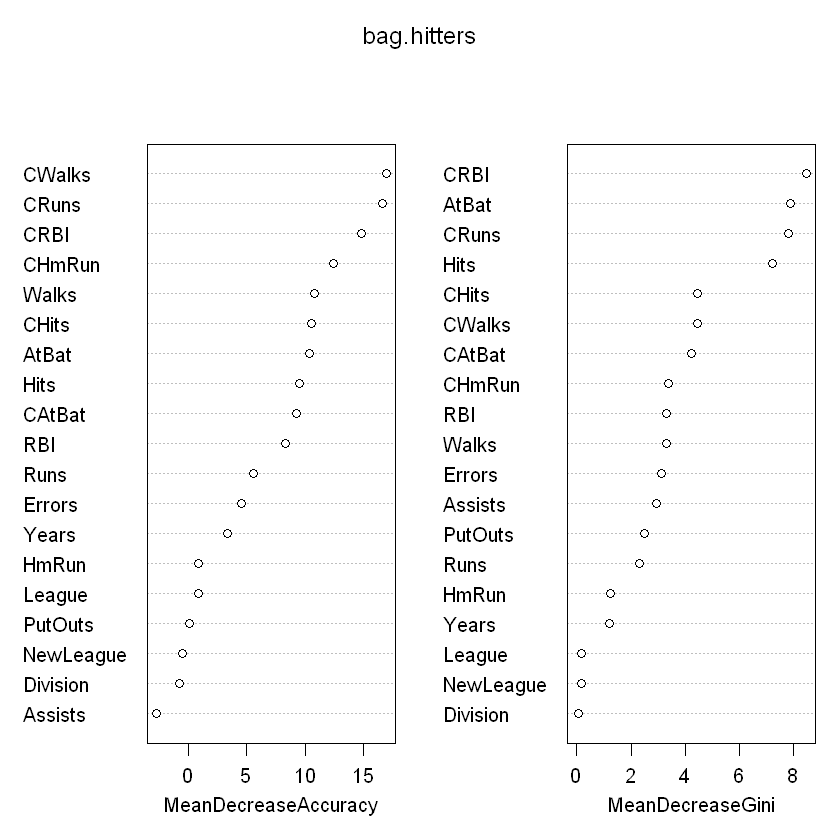

In [51]:
varImpPlot(bag.hitters)

### Random Forest - mtry < all of features

In [48]:
set.seed(5)
rf.hitters = randomForest(HighSal~.-Salary1-Salary, data=Hitters1, subset = train, ntree = 500, mtry = 5, importance = TRUE)
rf.hitters
# mtry - how many predictors we need to take


Call:
 randomForest(formula = HighSal ~ . - Salary1 - Salary, data = Hitters1,      ntree = 500, mtry = 5, importance = TRUE, subset = train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 5

        OOB estimate of  error rate: 16%
Confusion matrix:
     No Yes class.error
No  116  12   0.0937500
Yes  16  31   0.3404255

In [49]:
# predict for test data
yhat.rf=predict(rf.hitters, newdata = Hitters.test, type = "Class")
yhat.rf
table(yhat.rf, HighSal.test)

-Alan Ashby     -Andre Dawson   -Andre Thornton    -Alan Trammell 
               No               Yes                No               Yes 
   -Andy VanSlyke       -Bill Almon      -Barry Bonds    -Bobby Bonilla 
               No                No                No                No 
         -Bo Diaz    -Brian Downing    -Billy Hatcher     -Brook Jacoby 
               No               Yes                No                No 
     -Chris Brown     -Carlton Fisk        -Curt Ford  -Carney Lansford 
               No               Yes                No               Yes 
    -Chris Speier   -Curt Wilkerson    -Dave Anderson     -Daryl Boston 
               No                No                No                No 
    -Dwight Evans      -Davey Lopes    -Don Mattingly   -Dick Schofield 
              Yes                No               Yes                No 
    -Eddie Milner      -Frank White     -Glenn Braggs     -George Brett 
               No               Yes                No               Yes 
     -Glenn Davis      -Gary Gaetti    -Glenn Hubbard       -Garth Iorg 
               No               Yes                No                No 
     -Greg Walker  -Harold Reynolds   -John Cangelosi     -Jose Canseco 
               No                No                No                No 
      -Jack Clark        -Jim Dwyer      -Jim Gantner      -Jack Howell 
               No                No               Yes                No 
    -Jim Morrison   -Jerry Mumphrey         -Jim Rice    -Jerry Royster 
              Yes                No               Yes                No 
    -John Russell      -John Shelby      -Kal Daniels   -Keith Moreland 
               No                No                No               Yes 
   -Ken Oberkfell       -Ken Phelps    -Kirby Puckett    -Larry Herndon 
              Yes                No                No                No 
    -Lloyd Moseby    -Lance Parrish     -Mike Aldrete      -Mike Easler 
              Yes                No                No                No 
 -Mike LaValliere  -Mike Pagliarulo -Mickey Tettleton    -Milt Thompson 
               No                No                No                No 
 -Pete Incaviglia        -Pete Rose    -Rick Burleson      -Rick Cerone 
               No                No                No                No 
        -Rob Deer     -Rick Dempsey       -Ron Kittle       -Rick Leach 
               No                No                No                No 
  -Rafael Ramirez      -Roy Smalley   -Robby Thompson      -Rob Wilfong 
              Yes                No                No                No 
     -Robin Yount    -Steve Balboni   -Steve Buechele   -Scott Fletcher 
              Yes                No                No                No 
     -Steve Jeltz       -Spike Owen   -Tony Bernazard    -Tom Brunansky 
               No                No               Yes               Yes 
 -Terry Pendleton       -Tim Teufel    -Vince Coleman        -Von Hayes 
               No                No                No               Yes 
   -Wally Backman     -Wally Joyner  -Willie Randolph    -Willie Upshaw 
               No                No               Yes               Yes 
Levels: No Yes

       HighSal.test
yhat.rf No Yes
    No  60   5
    Yes  5  18

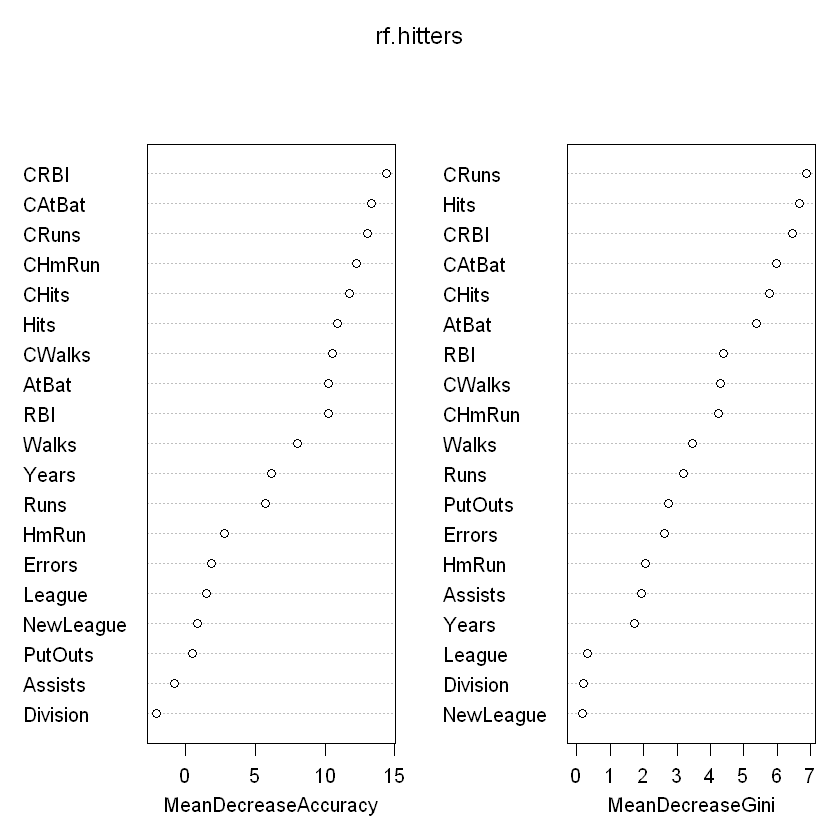

In [50]:
varImpPlot(rf.hitters)